In [1]:
# imports
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('kmeans_labels.csv')
selected_columns = ["infant_id", "frame_id", "emotion"]
data = data[selected_columns]
data.head()

,infant_id,frame_id,emotion
0,0,1052,Moderately Expressive
1,0,1053,Moderately Expressive
2,0,1054,Moderately Expressive
3,0,1055,Moderately Expressive
4,0,1056,Moderately Expressive


In [3]:
# Function to get the frame from the video
def get_frame(video_path, frame_number):
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    cap.release()
    if ret:
        return cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    else:
        print(f"Failed to extract frame {frame_number} from {video_path}")
        return None

In [4]:
video_folder = '/workspaces/wiggle-face/data-ioana/YT/orig_videos'
# function to display a selected row
def display_row(row_index):
    if row_index < 0 or row_index >= len(data):
        print("Invalid row index")
        return
    
    row = data.iloc[row_index]
    infant_id = row['infant_id']
    frame_id = row['frame_id']
    emotion = row['emotion']
    
    # video file path
    video_filename = f'video_{infant_id:06d}.mp4'
    video_path = f'{video_folder}/{video_filename}'
    
    # get the frame
    frame = get_frame(video_path, frame_id)
    
    if frame is not None:
        plt.figure(figsize=(10, 6))
        plt.imshow(frame)
        plt.title(f'Emotion: {emotion}')
        plt.axis('off')
        plt.show()
    else:
        print(f"Frame {frame_id} could not be retrieved from {video_filename}")

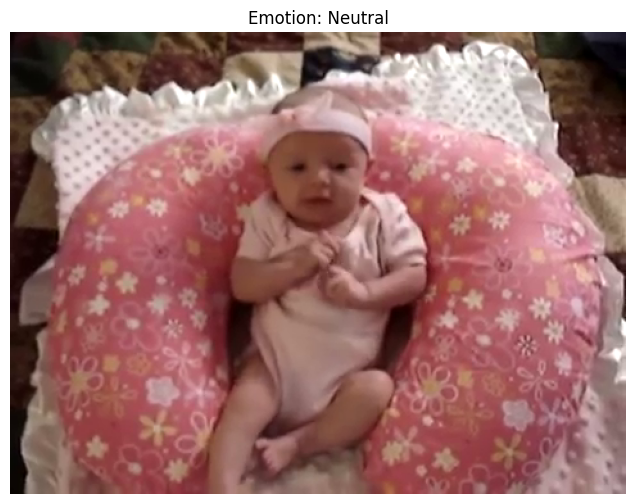

In [9]:
# example
display_row(900)

In [19]:
# expressive == curious  (big eyes)
# moderately expressive == happy
# neutral = sad